# RecDP LLM - ResumableTextPipeline

ResumableTextPipeline is designed for processing large dataset with failover support.

User can link all the todo operations one by one and provide to pipeline. We will use a track log to capture the progress.

If interruption happens in the middle of process, re-lauch the pipeline will resume from where left.

# Get started

## 1. Install pyrecdp and dependencies

In [ ]:
! DEBIAN_FRONTEND=noninteractive apt-get install -y openjdk-8-jre
! pip install pyrecdp --pre
# ! pip install 'git+https://github.com/intel/e2eAIOK.git#egg=pyrecdp&subdirectory=RecDP'

## 2. Prepare test data

In [ ]:
%mkdir -p /content/test_data
%cd /content/test_data
!wget -P /content/test_data https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/arxiv_sample_100.jsonl
!wget -P /content/test_data https://raw.githubusercontent.com/intel/e2eAIOK/main/RecDP/tests/data/llm_data/tiny_c4_sample.jsonl

## 3. ResumableTextPipeline

In [3]:
from pyrecdp.LLM import TextPipeline, ResumableTextPipeline
from pyrecdp.primitives.operations import *

# Below is just a quick example of using some of the operation,
# full operation list please refer to RecDP LLM readme.

pipeline = ResumableTextPipeline()
ops = [
    JsonlReader("/content/test_data"),
    LengthFilter(),
    ProfanityFilter(),
    LanguageIdentify(),
    PerfileParquetWriter("ResumableTextPipeline_output")
]
pipeline.add_operations(ops)
pipeline.execute()

JAVA_HOME is not set, use default value of /usr/lib/jvm/java-8-openjdk-amd64/


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


init ray with total mem of 8167956480


2023-10-11 19:35:25,199	WARNING services.py:1889 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 6133121024 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=8.37gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2023-10-11 19:35:26,357	INFO worker.py:1642 -- Started a local Ray instance.
2023-10-11 19:35:30,545	INFO read_api.py:406 -- To satisfy the requested parallelism of 2, each read task output is split into 2 smaller blocks.
2023-10-11 19:35:30,607	INFO read_api.py:406 -- To satisfy the requested parallelism of 5, each read task output is split into 5 smaller blocks.
ResumableTextPipeline, current on tiny_c4_sample.jsonl:   0%|          | 0/2 [00:00<?, ?it/s]2023-10-11 19:35:30,643	INFO streaming_executor.

Running 0:   0%|          | 0/4 [00:00<?, ?it/s]

2023-10-11 19:35:32,641	WARNING plan.py:567 -- Warning: The Ray cluster currently does not have any available CPUs. The Dataset job will hang unless more CPUs are freed up. A common reason is that cluster resources are used by Actors or Tune trials; see the following link for more details: https://docs.ray.io/en/master/data/dataset-internals.html#datasets-and-tune
2023-10-11 19:35:32,648	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadText->SplitBlocks(2)] -> TaskPoolMapOperator[Map(<lambda>)->Filter(<lambda>)]
2023-10-11 19:35:32,651	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-10-11 19:35:32,652	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verb

Running 0:   0%|          | 0/4 [00:00<?, ?it/s]

(Map(<lambda>)->Filter(<lambda>) pid=1731) 2023-10-11 19:35:40.103464: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Processed a total of 449 rows of data, filtered out 8 rows of data


2023-10-11 19:35:44,114	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadText->SplitBlocks(2)] -> TaskPoolMapOperator[Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>)]
2023-10-11 19:35:44,116	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-10-11 19:35:44,120	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


Running 0:   0%|          | 0/4 [00:00<?, ?it/s]

Processed a total of 441 rows of data, filtered out 4 rows of data



2023-10-11 19:36:13,793	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadText->SplitBlocks(2)] -> TaskPoolMapOperator[Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>)->Map(<lambda>)->Write]
2023-10-11 19:36:13,799	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-10-11 19:36:13,803	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


Running 0:   0%|          | 0/4 [00:00<?, ?it/s]

(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>)->Map(<lambda>)->Write pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>)->Map(<lambda>)->Write pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
ResumableTextPipeline, current on arxiv_sample_100.jsonl:  50%|█████     | 1/2 [00:50<00:50, 50.65s/it]2023-10-11 19:36:21,291	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadText->SplitBlocks(5)] -> TaskPoolMapOperator[Map(<lambda>)]
2023-10-11 19:36:21,293	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-10-11 

Running 0:   0%|          | 0/25 [00:00<?, ?it/s]

2023-10-11 19:36:21,812	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadText->SplitBlocks(5)] -> TaskPoolMapOperator[Map(<lambda>)->Filter(<lambda>)]
2023-10-11 19:36:21,814	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-10-11 19:36:21,817	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


Running 0:   0%|          | 0/25 [00:00<?, ?it/s]

(Map(<lambda>)->Filter(<lambda>) pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>) pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>) pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>) pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>) pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
2023-10-11 19:36:38,064	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadText->Spl

Processed a total of 100 rows of data, filtered out 0 rows of data


Running 0:   0%|          | 0/25 [00:00<?, ?it/s]

(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>) pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>) pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>) pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>) pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>) pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
2023-10-11 19:36:45,890	INFO streaming_e

Processed a total of 100 rows of data, filtered out 0 rows of data


Running 0:   0%|          | 0/25 [00:00<?, ?it/s]

(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>)->Map(<lambda>)->Write pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>)->Map(<lambda>)->Write pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>)->Map(<lambda>)->Write pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>)->Map(<lambda>)->Write pid=1731) Warning : `load_model` does not return WordVectorModel or SupervisedModel any more, but a `FastText` object which is very similar.
(Map(<lambda>)->Filter(<lambda>)->Filter(<lambda>)->Map(<lambda>)->Write pid=1731) Warning : `load_model` does not return WordVectorModel or Sup

Completed!
ResumableTextPipeline will not return dataset, please check ResumableTextPipeline_output for verification.


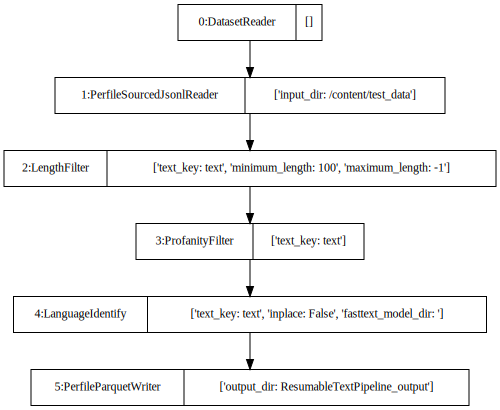

In [4]:
pipeline.plot()

## 4. View processed data

In [5]:
! cat ResumableTextPipeline_output/status.log

tiny_c4_sample.jsonl, 50.65073895454407 secs
arxiv_sample_100.jsonl, 46.28073239326477 secs


In [6]:
! ls ResumableTextPipeline_output/

arxiv_sample_100.jsonl	pipeline.json  status.log  tiny_c4_sample.jsonl


In [7]:
import pandas as pd
pd.read_parquet("ResumableTextPipeline_output/arxiv_sample_100.jsonl")

,text,meta,source_id,language
0,\section{Introduction}\n\label{sec:intro}\n\n\...,"{'timestamp': '2022-03-30T02:27:00', 'yymm': '...",arxiv_sample_100.jsonl,eng_Latn
1,\section{Introduction}\n\nOne of the fundament...,"{'timestamp': '1998-07-19T14:33:52', 'yymm': '...",arxiv_sample_100.jsonl,eng_Latn
2,\section{Introduction}\n\nContinuous Engineeri...,"{'timestamp': '2020-08-18T02:18:33', 'yymm': '...",arxiv_sample_100.jsonl,eng_Latn
3,\section{Introduction}\nWhen granular material...,"{'timestamp': '2002-03-19T12:47:20', 'yymm': '...",arxiv_sample_100.jsonl,eng_Latn
4,\section{\label{sec:intro}Introduction}\n \nDe...,"{'timestamp': '2022-10-20T02:16:28', 'yymm': '...",arxiv_sample_100.jsonl,eng_Latn
...,...,...,...,...
95,\section{Introduction\label{sec-introduction}}...,"{'timestamp': '2023-01-09T02:13:57', 'yymm': '...",arxiv_sample_100.jsonl,eng_Latn
96,\section{Introduction}\n\nThroughout this pape...,"{'timestamp': '2022-02-15T02:07:14', 'yymm': '...",arxiv_sample_100.jsonl,eng_Latn
97,"\section{Introduction}\n\nIn what follows, $k\...","{'timestamp': '2019-07-16T02:03:16', 'yymm': '...",arxiv_sample_100.jsonl,eng_Latn
98,\chapter{Comments on the Measurement of Vermee...,"{'timestamp': '2021-03-17T01:10:13', 'yymm': '...",arxiv_sample_100.jsonl,eng_Latn


In [8]:
import pandas as pd
pd.read_parquet("ResumableTextPipeline_output/tiny_c4_sample.jsonl")

,text,meta,source_id,language
0,lorazepam nombre comercial mexico From an inte...,"{""timestamp"":""2019-04-24T02:17:53Z"",""url"":""htt...",arxiv_sample_100.jsonl,eng_Latn
1,It is possible to love someone who does not lo...,"{""timestamp"":""2019-04-23T06:32:35Z"",""url"":""htt...",arxiv_sample_100.jsonl,eng_Latn
2,Canon PIXMA TS9520 All-in-One Print / Scan / C...,"{""timestamp"":""2019-04-25T17:03:36Z"",""url"":""htt...",arxiv_sample_100.jsonl,eng_Latn
3,For those who plan on buying an iPad this Satu...,"{""timestamp"":""2019-04-22T22:39:52Z"",""url"":""htt...",arxiv_sample_100.jsonl,eng_Latn
4,"After tipping 25 tokens in a day, you'll be ab...","{""timestamp"":""2019-04-20T00:25:13Z"",""url"":""htt...",arxiv_sample_100.jsonl,eng_Latn
...,...,...,...,...
432,Sunrise is an equal opportunity employer. Vete...,"{""timestamp"":""2019-04-22T10:28:15Z"",""url"":""htt...",arxiv_sample_100.jsonl,eng_Latn
433,Home / Business / #Exploitation: Coca Cola is ...,"{""timestamp"":""2019-04-24T18:04:45Z"",""url"":""htt...",arxiv_sample_100.jsonl,eng_Latn
434,I got really surprised when I saw that I recei...,"{""timestamp"":""2019-04-26T08:57:28Z"",""url"":""htt...",arxiv_sample_100.jsonl,eng_Latn
435,Here's a brief schedule for 2016 as requested ...,"{""timestamp"":""2019-04-18T10:15:11Z"",""url"":""htt...",arxiv_sample_100.jsonl,eng_Latn
